In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Financial Summary Table

# Fetch stock data
aib_info = yf.Ticker("A5G.IR").info
paypal_info = yf.Ticker("PYPL").info

# Function to safely get financial data
def get_financial_data(info, key):
    return info.get(key, 'N/A')

# Create DataFrame for fundamental comparison
fundamental_data = pd.DataFrame({
    "Metric": ["Market Cap", "P/E Ratio", "Revenue"],
    "FinTech (PayPal)": [
        get_financial_data(paypal_info, "marketCap"),
        get_financial_data(paypal_info, "trailingPE"),
        get_financial_data(paypal_info, "totalRevenue")
    ],
    "Traditional Bank (AIB Group)": [
        get_financial_data(aib_info, "marketCap"),
        get_financial_data(aib_info, "trailingPE"),
        get_financial_data(aib_info, "totalRevenue")
    ]
})

# Display the table
print("\nFinancial Summary Table:")
print(fundamental_data)


Financial Summary Table:
       Metric  FinTech (PayPal)  Traditional Bank (AIB Group)
0  Market Cap      6.642760e+10                  1.420348e+10
1   P/E Ratio      1.682957e+01                  6.559140e+00
2     Revenue      3.179700e+10                  4.852000e+09


In [5]:
#Fetch Stock Data for Graphs

# Download historical stock data
aib_data = yf.download("A5G.IR", start="2020-01-01", end="2025-01-01")
paypal_data = yf.download("PYPL", start="2020-01-01", end="2025-01-01")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


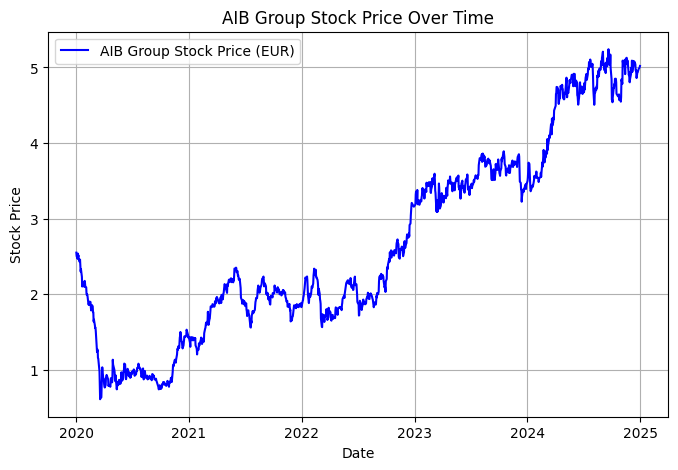

In [16]:

# Plot AIB Stock Price
plt.figure(figsize=(8,5))
plt.plot(aib_data["Close"], label="AIB Group Stock Price (EUR)", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("AIB Group Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()




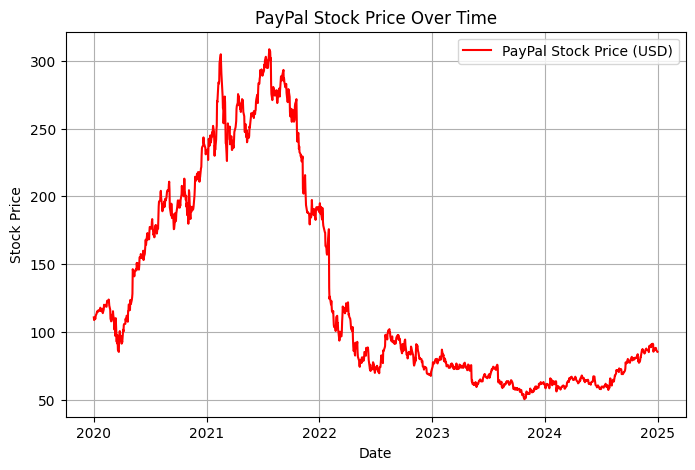

In [12]:
# Plot PayPal Stock Price
plt.figure(figsize=(8,5))
plt.plot(paypal_data["Close"], label="PayPal Stock Price (USD)", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("PayPal Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

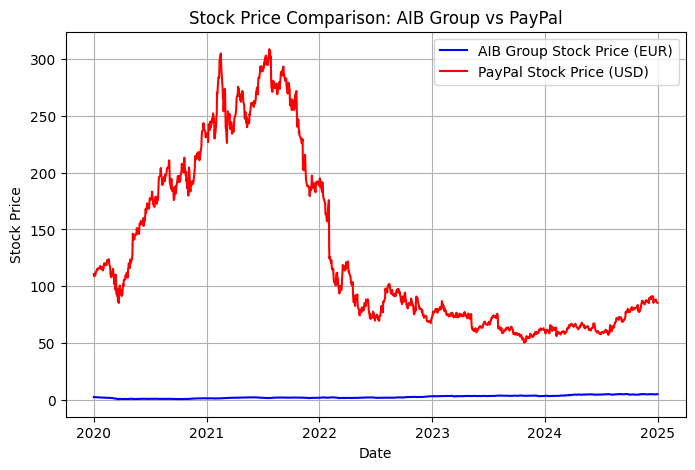

In [13]:

# Plot both stock prices together
plt.figure(figsize=(8,5))
plt.plot(aib_data["Close"], label="AIB Group Stock Price (EUR)", color='blue')
plt.plot(paypal_data["Close"], label="PayPal Stock Price (USD)", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Comparison: AIB Group vs PayPal")
plt.legend()
plt.grid(True)
plt.show()

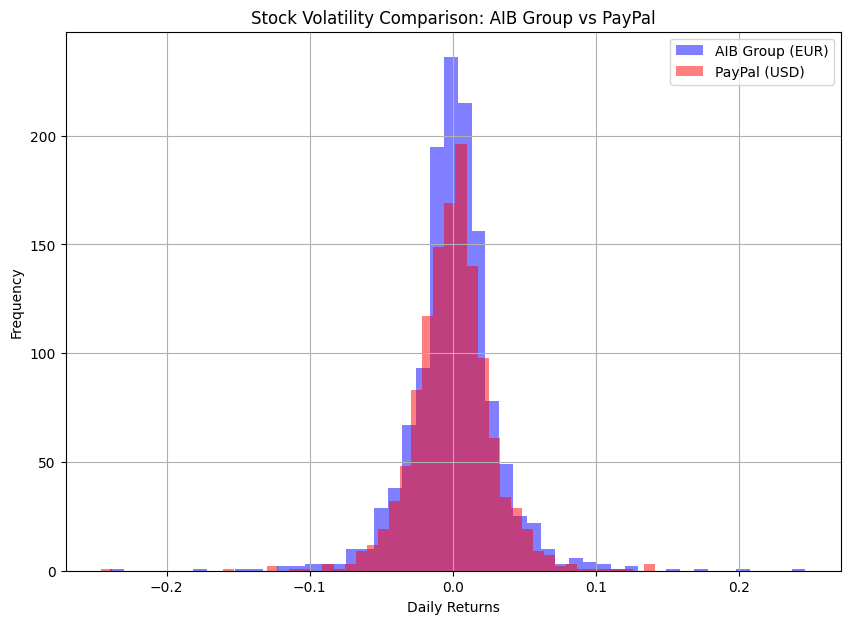

In [15]:
# Volatility Comparison (Histogram of Daily Returns) ###

# Calculate daily returns
aib_returns = aib_data['Close'].pct_change().dropna()
paypal_returns = paypal_data['Close'].pct_change().dropna()

# Plot histograms
plt.figure(figsize=(10,7))
plt.hist(aib_returns, bins=50, alpha=0.5, label="AIB Group (EUR)", color='blue')
plt.hist(paypal_returns, bins=50, alpha=0.5, label="PayPal (USD)", color='red')
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Stock Volatility Comparison: AIB Group vs PayPal")
plt.legend()
plt.grid(True)
plt.show()